# Restaurant Performance Analysis

# Tasks

## Task 1: Create your own dataset

* You should randomly remove some rows in the Restaurants_orders dataset to get your own dataset. This is to ensure that everyone will use a different dataset.
* The rows to be removed must be random. You may set up your random seed in Python by your student number:
    * Python code: import random, random.seed(your student number)
    * Since you used the same seed, everytime you run your code, it will remove the same sequence of rows. Therefore you would get the same dataset for your own use. 
* You may name and save your dataset as Mydataset or by a name you choose.
* You are expected to define a function that outputs your dataset. Your function should have two arguments: One is a dataset in Pandas' DataFrame, and the second is your ID number.

## Solution Task 1:

In [2]:
import pandas as pd
import random #Importing random for generating random numbers for Task1
from datetime import * #Importing datetime to perform datetime operations
import matplotlib.pyplot as plt #Importing matplotlib for plotting the graphs for Task2

In [3]:
#Reading data from file
orders = pd.read_csv('Restaurants_orders.zip')
orders.shape #to check number of rows and columns of imported data

In [4]:
# Converting one column to DATETIME so that DATETIME operations could be performed on it
orders.DATETIME = (pd.to_datetime(orders.DATETIME))
print(min(orders['DATETIME']))
print(max(orders['DATETIME']))

In [6]:
# getting all the unique values from RESTAURANT ID column to get list and number of restaurants
Restaurant_id= orders.RESTAURANT_ID.unique().tolist()
print(f'Number of restaurants = {len(Restaurant_id)}')
print(sorted(Restaurant_id))
Restaurant_id=sorted(Restaurant_id) # storing the sorted list in Restaurant_id

In [8]:
df= pd.DataFrame(data= orders)
df.head(10)

In [9]:
def new_dataset(df, ID_number):
    random.seed(ID_number)
    randomlist = random.sample(range(1, 2387224), ID_number) #generating a list of random numbers with the size of the last 3 digit of ID number
    my_dataset=df.drop(randomlist) #removing the randomly selected rows from the dataset

    return my_dataset   #the new dataset.

In [11]:
my_dataset= new_dataset(df,696) #Last 3 digits of ID number =696
my_dataset = my_dataset.reset_index(drop=True) #resetting the index of our new dataframe
my_dataset

## Task 2: Performance analysis on individual branches

* Recall that each row of the dataset is an order on a certain day in a restaurant branch.
* The manager would like to know how many orders have been placed for each branch and whether there exists some trend.

    * Pick one restaurant branch, say R10001, compute the number of orders in each week of the year.
    * Plot the line graph of the number of orders against its corresponding week of the year. 
    * Repeat the above for all other branches so that you would have plotted eight graphs in total. Please comment on the trend of the number of orders 
      (e.g., peak period, whether it happened in summer or in winter).
    * You are suggested to create a loop over the restaurant ids so that it would generate
      all graphs in one go. 

## Solution Task 2:

In [13]:
#adding a week number column which stores the the week number corrospinding to the date of the order
my_dataset['WEEK_NUMBER']= my_dataset['DATETIME'].dt.isocalendar().week
my_dataset

In [14]:
print("Number of orders for each restaurant branch")
#Printing number of orders for each restaurant using for loop
for i in Restaurant_id:
    print(i+" :"+str(sum(my_dataset[my_dataset["RESTAURANT_ID"]==i].WEEK_NUMBER.value_counts())))

Number of orders for each restaurant branch
R10001 :250735
R10002 :325172
R10003 :227370
R10004 :430744
R10005 :281910
R10006 :274932
R10007 :281091
R10008 :314574


#### The maximum number of orders has been received by Restaurant 4 (R10004) -> 430744
#### The minimum number of orders has been received by Restaurant 3 (R10003) -> 227370

In [16]:
#Calculating orders per week for first restaurant i.e. R10001
Orders_per_week_R10001= my_dataset[my_dataset["RESTAURANT_ID"]=='R10001'] #Creating a new dataframe with only restaurant 1 orders
#Grouping the data based on Week Number and counting the Order ID's against each week of restaurant 1
#We are counting Order ID's as each Order ID = 1 order
df_Orders_per_week_R10001=Orders_per_week_R10001.groupby(["RESTAURANT_ID","WEEK_NUMBER"])["ORDER_ID"].count()
df_Orders_per_week_R10001=df_Orders_per_week_R10001.to_frame() #Converting series to data frame
df_Orders_per_week_R10001=df_Orders_per_week_R10001.rename(columns={'ORDER_ID': 'NUMBER_OF_ORDERS'}) #Renaming ORDER_ID column to NUMBER_OF_ORDERS
df_Orders_per_week_R10001

In [17]:
#Calculating orders per week for any Restaurant
def weekly_order(Rest_ID):
    Orders_per_week= my_dataset[my_dataset["RESTAURANT_ID"]==Rest_ID] #Creating a new dataframe with any 1 restaurant orders
    #Grouping the data based on Week Number and counting the Order ID's against each week of any restaurant
    #We are counting Order ID's as each Order ID = 1 order
    df_Orders_per_week=Orders_per_week.groupby(["RESTAURANT_ID","WEEK_NUMBER"])["ORDER_ID"].count()
    df_Orders_per_week=df_Orders_per_week.to_frame() #Converting series to data frame
    df_Orders_per_week=df_Orders_per_week.rename(columns={'ORDER_ID': 'NUMBER_OF_ORDERS'}) #Renaming ORDER_ID column to NUMBER_OF_ORDERS
    return(df_Orders_per_week)

In [19]:
df_Orders_per_week=weekly_order('R10004') # Calling the function weekly_order with any Restaurant ID
df_Orders_per_week

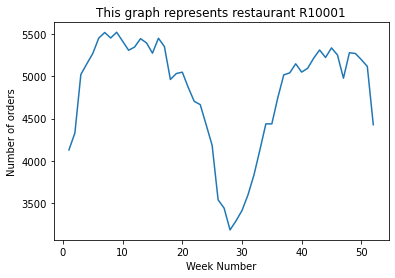

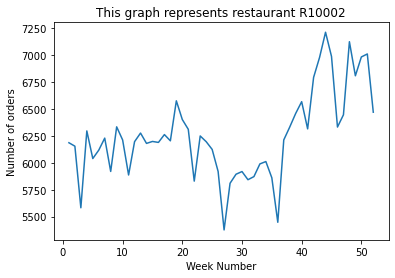

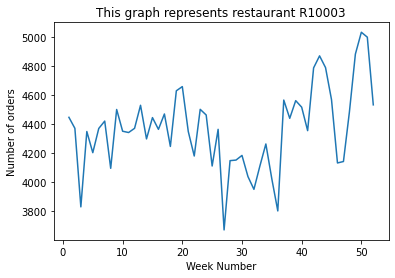

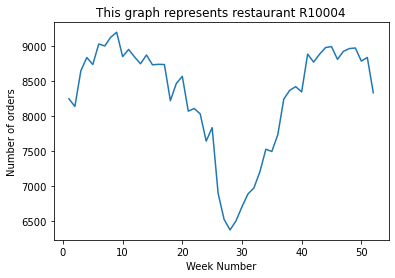

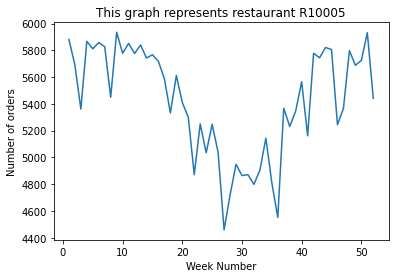

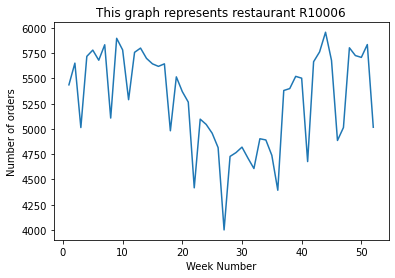

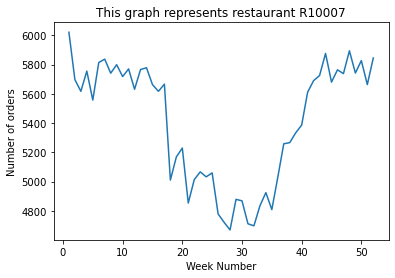

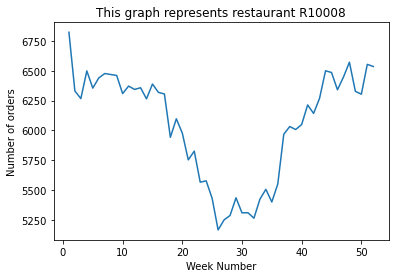

In [20]:
#Plotting Number of orders against Week Number for all 8 restaurants
for i in Restaurant_id:
    plt.figure()
    my_dataset[my_dataset["RESTAURANT_ID"]==i].WEEK_NUMBER.value_counts().sort_index().plot(kind='line',
    title="This graph represents restaurant "+i)
    plt.xlabel("Week Number")
    plt.ylabel("Number of orders")
    plt.show()

## Trends:

## Task 3: Computing key quantities

### Task 3.1: It is noted that there are three types of services (TYPE column): IN-STORE, DELIVERY and PICKUP. It is important to know the percentage of each service so as to understand their contributions.

(a) Pick one restaurant branch, say R10001, compute the following six quantities:

    * For each type of DELIVERY, IN_STORE and PICKUP, compute
        
        * Number_of_Orders: the total number of orders made in each type (e.g., by DELIVERY)
        * Percent_of_Orders: the percentage of the orders above out of the toatl orders
    
    * Hence, you would have calculated six quantities.
    
(b) Repeat the task in (a) for all other restaurants and put your outputs in a dataframe.

    * Let us call your dataframe by type_summary. 
    * The index of type_summary should be of restaurant ids
    * type_summary should have three columns: TYPE, NUMBER_OF_ORDERS, and PERCENT_OF_ORDERS.
    * Print out your dataframe.
    

### Task 3.2: Each restaurant branch also sells DRINKS and COOKIES. Suppose each drink costs £3.80 and each cookie sells for £1.20. 

(c) Pick one restaurant branch, say R10001, compute the total revenue 
    for DRINKS and COOKIES combined.
    
    * You are suggested to define a function, which takes two inputs.
    * One input is your dataset.
    * The other is a restaurant id of your chosen (e.g., R10001)
    * The output of your function is the total revenue of that restaurant 
      made from Drinks and Cookies.
    * Print out your result.

## Solution Task 3.1:

In [22]:
#Calculationg Number of Orders and Percentage of Orders for each type of order in FIRST restaurant 
Restaurant_1=my_dataset[my_dataset["RESTAURANT_ID"]=='R10001'] #Creating a new dataframe with only restaurant 1 orders
#Grouping thr data based on Week Number and counting the Order ID's against each week of restaurant 1
#We are counting Order ID's as each Order ID = 1 order
Restaurant_1_group=Restaurant_1.groupby(["RESTAURANT_ID", "TYPE"])["ORDER_ID"].count()
df_R10001=Restaurant_1_group.to_frame() #Converting series to data frame
df_R10001=df_R10001.rename(columns={'ORDER_ID': 'NUMBER_OF_ORDERS'}) #Renaming ORDER_ID column to NUMBER_OF_ORDERS
df_R10001['PERCENT_OF_ORDERS']=(df_R10001['NUMBER_OF_ORDERS']/df_R10001['NUMBER_OF_ORDERS'].sum())*100 #Calculating percentage for each order type
df_R10001=df_R10001.reset_index()
df_R10001=df_R10001.set_index('RESTAURANT_ID') #Setting RESTAURANT_ID as index
df_R10001

In [23]:
# Calculating Number of Orders and Percentage of Orders for each type of order for ALL restaurants same as above
type_summary=pd.DataFrame()

for i in Restaurant_id:
    Restaurant_tmp=my_dataset[my_dataset["RESTAURANT_ID"]==i]
    Restaurant_tmp_group=Restaurant_tmp.groupby(["RESTAURANT_ID", "TYPE"])["ORDER_ID"].count()
    df_tmp=Restaurant_tmp_group.to_frame()
    df_tmp=df_tmp.rename(columns={'ORDER_ID': 'NUMBER_OF_ORDERS'})
    df_tmp['PERCENT_OF_ORDERS']=(df_tmp['NUMBER_OF_ORDERS']/df_tmp['NUMBER_OF_ORDERS'].sum())*100
    df_tmp=df_tmp.reset_index()
    df_tmp=df_tmp.set_index('RESTAURANT_ID')
    type_summary=type_summary.append(df_tmp)# appending each restaurant calculated data to the final data frame

In [25]:
type_summary

## Solution Task 3.2:

In [27]:
# Calculating total revenue for DRINKS and COOKIES combined  by passing our dataset and restaurant id
def revenue(my_dataset,Rest_ID):
    single_restaurant_data=my_dataset[my_dataset["RESTAURANT_ID"]==Rest_ID] #Creating a new dataframe with only single restaurant orders
    drinks_revenue=(single_restaurant_data['DRINKS'].sum())*3.80 #From the new dataframe adding all the number of orders of drinks using the sum() function and multiplying it with the revenue for each drink
    cookies_revenue=(single_restaurant_data['COOKIES'].sum())*1.20 #From the new dataframe adding all the number of orders of cookies using the sum() function and multiplying it with the revenue for each cookie
    total_revenue= drinks_revenue+cookies_revenue
    return total_revenue

total_revenue=revenue(my_dataset,'R10003') #We can pass here any restaurant number
print("£",total_revenue)

## Task 4: Pricing

Suppose the restaurant would like to creat a standard menu, which consists of the following items

* Drinks
* Cookies
* Main
* Base
* Side 1
* Side 2

The items can be ordered separately. For example, one order may contain 1 Drink, 1 Cookie, 1 Main and 1 Side 1 without ordering Base or Side 2. The restaurant wants to price those items so that they can achieve the highest revenue. They have the following conditions on the menu:

* A full order, which consists of one unit of every item available, should not cost more than £30.
* The cost of one drink, denoted as p_drink, should be between £2 and £4.
* The cost of one cookie, denoted as p_cookie, should be between £0.5 and £1.5.
* The cost of one unit of Main, denoted as p_main, should be between £8 and £25. 
* The cost of one unit of Base, denoted as p_base, should be between £1 and £3.
* The cost of one serve of Side 1, denoted as p_side1, should be between £1 and £2.5.
* The cost of one serve of Side 2, denoted as p_side2, should be between £1.5 and £3.

Now pick one restaurant branch by the following rule:

* If the last digit of your student number is one of the following digits {1, 2, 3, 4, 5, 6, 7, 8}, use your last digit to select your branch. For example, if your last digit is 4, pick the restaurant branch R10004.
* If the last digit of your student number is 0, pick the restaurant branch R10001.
* If the last digit of your student number is 9, pick the restaurant branch R10008.

Compute the following quantities for your selected restaurant branch:

* The total number of orders for Drinks. We denote it as n_drinks.
* The total number of orders for Cookies. We denote it as n_cookies.
* The total number of orders for Main. We denote it as n_main. 
    * Note that the value in each cell under the Main column is either NaN (not a number) or a string value (representing a type of main food). Each cell should count as 0 order if its value is NaN or as 1 one if its value is not NaN.
* The total number of orders for Base. 
    * We denote it as n_base. Each cell should count as 0 order if its value is NaN or as 1 order if its value is not NaN. 
* The total number of orders for Side 1. We denote it as n_side1.
    * We denote it as n_base. Each cell should count as 0 order if its value is NaN or as 1 order if its value is not NaN.
* The total number of orders for Side 2. We denote it as n_side2.
    * We denote it as n_base. Each cell should count as 0 order if its value is NaN or as 1 order if   its value is not NaN.

Use linear programming to formulate the problem of deciding the best prices for those items so that your chosen restaurant would generate the maximum revenue.

* Describe your linear programming formulation
* Solve your linear programming problem in PuLP. 
* Print out your solution and the optimal objective value. 


## Solution Task 4:

In [29]:
#Calculating the number of orders of all items for Restaurant6(R10006). As my Student ID ends with 6 
Restaurant_6=my_dataset[my_dataset['RESTAURANT_ID']=='R10006']
n_drinks=Restaurant_6['DRINKS'].sum()
n_cookies=Restaurant_6['COOKIES'].sum()
n_main=Restaurant_6['MAIN'].count()
n_base=Restaurant_6['BASE'].count()
n_side1=Restaurant_6['SIDE_1'].count()
n_side2=Restaurant_6['SIDE_2'].count()
n_drinks,n_cookies,n_main,n_base,n_side1,n_side2

In [30]:
from pulp import * #Importing pulp to perform linear programming using pulp
MenuProb = LpProblem("Standard_Menu_Problem", LpMaximize) #Defining the type of problem i.e. Maximization

#Defining the decision variables i.e. the price of each item
p_drinks = LpVariable(name="p_drinks", lowBound=0)
p_cookies = LpVariable(name="p_cookies", lowBound=0)
p_main = LpVariable(name="p_main", lowBound=0)
p_base = LpVariable(name="p_base", lowBound=0)
p_side1 = LpVariable(name="p_side1", lowBound=0)
p_side2 = LpVariable(name="p_side2", lowBound=0)

In [31]:
#Defining the constraints and adding each constraint to the problem
MenuProb += p_drinks+p_cookies+p_main+p_base+p_side1+p_side2 <=30
MenuProb += p_drinks>=2
MenuProb += p_drinks<=4
MenuProb += p_cookies>=0.5
MenuProb += p_cookies<=1.5
MenuProb += p_main>=8
MenuProb += p_main<=25
MenuProb += p_base>=1
MenuProb += p_base<=3
MenuProb += p_side1>=1
MenuProb += p_side1<=2.5
MenuProb += p_side2>=1.5
MenuProb += p_side2<=3

In [34]:
#Adding the Objective Function
MenuProb += n_drinks*p_drinks + n_cookies*p_cookies + n_main*p_main + n_base*p_base + n_side1*p_side1 + n_side2*p_side2
MenuProb

In [35]:
opt= MenuProb.solve() #Solving the model built above

In [36]:
# Printing the optimal solution for each decision variable
for var in MenuProb.variables():
    print(f"{var.name}: £{var.value()}")

p_base: £1.0
p_cookies: £0.5
p_drinks: £2.0
p_main: £24.0
p_side1: £1.0
p_side2: £1.5


In [38]:
print(f"Revenue for R10006 : £{MenuProb.objective.value()}") #Printing the objective value
print(f"status: {MenuProb.status}, {LpStatus[MenuProb.status]}") #Printing the optimality

Revenue for R10006 : £7302394.0
status: 1, Optimal
